Let $N$ be the number of sides on a die.
The probability ($p$) of rolling an N on any rolls is given by:
$$p=\frac{1}{N}$$


The probability of rolling an $N$ in $x$ rolls is given by the geometric distribution:
$$P(x) = (1-p)^{(1-x)}p$$

$$ P(x) = (1-\frac{1}{N})^{(1-x)}(\frac{1}{N})$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

In [2]:
   
def rollit(N, max_trials):
    p = 1/N
    for t in range(1,max_trials+1):
        if np.random.random() <p:
            break
        if t == max_trials: t*=2
    
    return {'p':p,'max_trials':max_trials,'success':t<max_trials,'t':t}


In [3]:
df = []
for _ in range(10):
    
    X = pd.DataFrame([rollit(N, 20) for _ in range(5000) for N in range(10,360,10)])
    X['inv_t'] =1/X['t']
    XX = X.groupby('p').mean().reset_index()
#     XX['failure'] = 1-XX['success']
#     XX['s'] = (X.groupby('p').std())['t']
    
    df.append(XX)

In [4]:
df = pd.concat(df)
df

,p,max_trials,success,t,inv_t
0,0.002857,20.0,0.0516,38.4180,0.032628
1,0.002941,20.0,0.0534,38.3554,0.033213
2,0.003030,20.0,0.0598,38.1498,0.034618
3,0.003125,20.0,0.0550,38.3126,0.033491
4,0.003226,20.0,0.0618,38.0634,0.035664
...,...,...,...,...,...
30,0.020000,20.0,0.3124,30.1116,0.084429
31,0.025000,20.0,0.3810,27.9094,0.095598
32,0.033333,20.0,0.4756,24.9128,0.116371
33,0.050000,20.0,0.6306,19.7526,0.159396


/home/land/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical left == right == 20.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/land/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical bottom == top == 20.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/land/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical left == right == 20.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


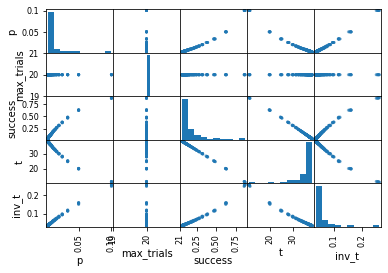

In [5]:
pd.plotting.scatter_matrix(df);

In [6]:
XX = df
y = XX.pop('p')
y = y
m = LR().fit(XX, y)

In [7]:
m.score(XX,y)

0.9978211089023509

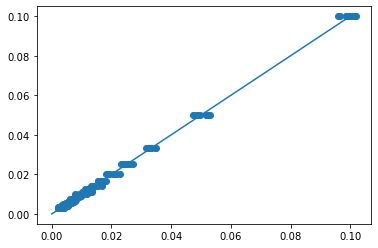

In [8]:
plt.scatter(m.predict(XX),y)
plt.plot([0,.1],[0,.1])

In [9]:
m.intercept_

0.19899080776300038

In [10]:
m.coef_

array([ 0.        , -0.19155838, -0.00527993,  0.48926443])

In [11]:
XX.columns

Index(['max_trials', 'success', 't', 'inv_t'], dtype='object')

In [12]:
XX

,max_trials,success,t,inv_t
0,20.0,0.0516,38.4180,0.032628
1,20.0,0.0534,38.3554,0.033213
2,20.0,0.0598,38.1498,0.034618
3,20.0,0.0550,38.3126,0.033491
4,20.0,0.0618,38.0634,0.035664
...,...,...,...,...
30,20.0,0.3124,30.1116,0.084429
31,20.0,0.3810,27.9094,0.095598
32,20.0,0.4756,24.9128,0.116371
33,20.0,0.6306,19.7526,0.159396


In [13]:
z = LR().fit(XX[['inv_t']],y)

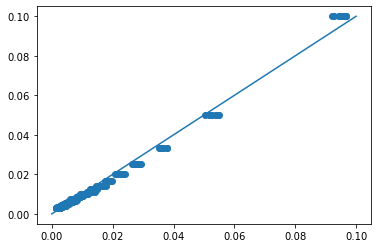

In [14]:
plt.scatter(z.predict(XX[['inv_t']]),y)
plt.plot([0,.1],[0,.1]);

In [15]:
z.coef_

array([0.41839677])